In [133]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import constants
import random
import pandas as pd
import itertools

Sample $[A]$ output for one part of the line for closed switch and open switch

In [134]:
# --------- Line parameters -------------
L0 = 1e-7
C1 = 3e-9
C2 = 3e-10
RL = 50

N = 16

# --------- f axis ------------
fstart = 1e3
fstop = 10000e9
fpoints = 100000

f = np.linspace(fstart, fstop, fpoints)

Z0 = np.sqrt(L0/C2)
gamma = 1e-10 + 1j*2*np.pi*f*np.sqrt(L0*C2)
L = 1e-6
l = L/N
Z_load = RL*np.ones(fpoints, dtype=np.complex256) # initialisation

In [135]:
A11 = Z0*np.sinh(gamma*l)
A12 = np.cosh(gamma*l)
A21 = A12
A22 = (1/Z0)*np.sinh(gamma*l)

A11 = np.abs(-2*f**2*C2*L0 + 1)
A12 = np.abs(-f**2 *C2*Z_load*L0 + 1j*f*L0)
A21 = np.abs((1j*f*C2)/(-2*f**2 *C2*L0 + 1))
A22 = np.abs(1j*C2*Z_load + 1)

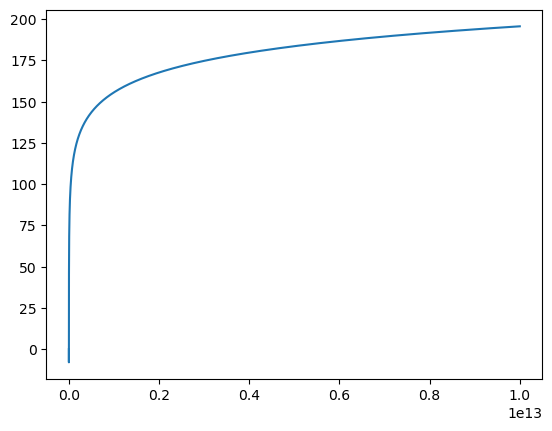

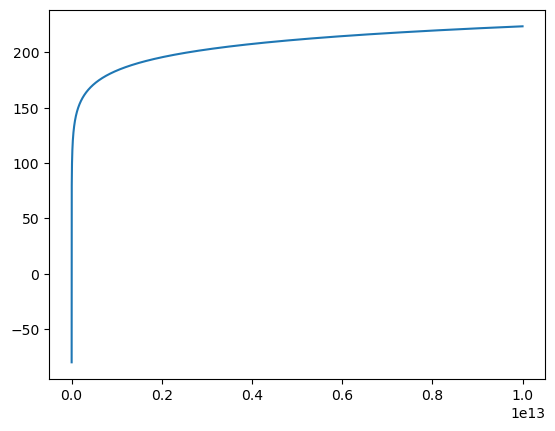

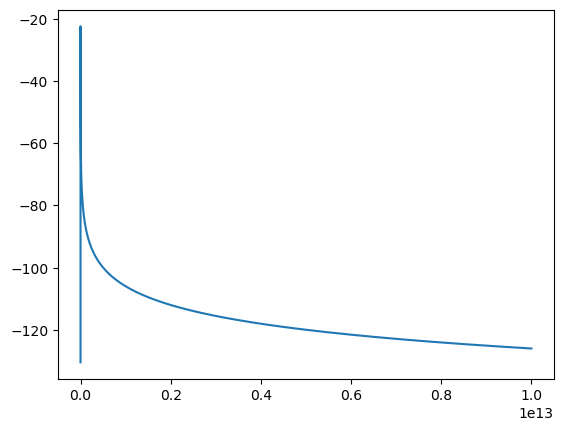

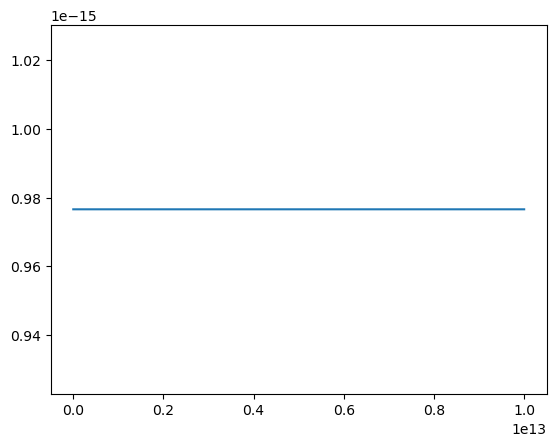

In [136]:
plt.figure()
plt.plot(f, 20*np.log10(np.abs(A11)))
plt.show()
plt.figure()
plt.plot(f, 20*np.log10(np.abs(A12)))
plt.show()
plt.figure()
plt.plot(f, 20*np.log10(np.abs(A21)))
plt.show()
plt.figure()
plt.plot(f, 20*np.log10(np.abs(A22)))
plt.show()

In [137]:
def find_S_matrix(a, b, c, d, L0, C, fpoints):
    S11 = np.array(fpoints, dtype=np.complex256)
    S12 = np.array(fpoints, dtype=np.complex256)
    S21 = np.array(fpoints, dtype=np.complex256)
    S22 = np.array(fpoints, dtype=np.complex256)

    Z0 = np.sqrt(L0/C)
    S11 = (a + b/Z0 - c/Z0 - d)/(a + b/Z0 + c/Z0 + d)
    S12 = 2 * (a*d - b*c) / (a + b/Z0 + c*Z0 + d)
    S21 = 2 / (a + b/Z0 + c*Z0 + d)
    S22 = (-a + b/Z0 - c*Z0 + d) / (a + b/Z0 + c*Z0 + d)
    return S11, S12, S21, S22

In [138]:
S11, S12, S21, S22 = find_S_matrix(A11, A12, A21, A22, L0, C2, fpoints)

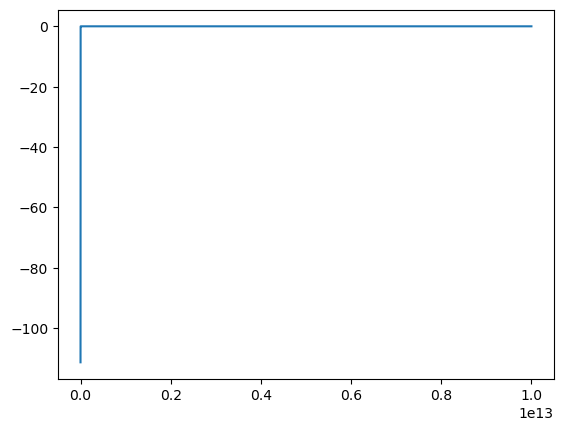

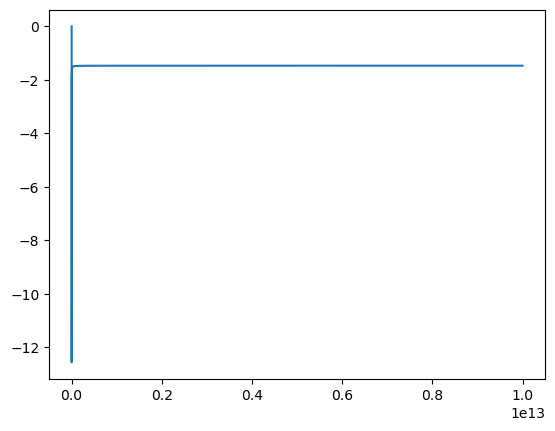

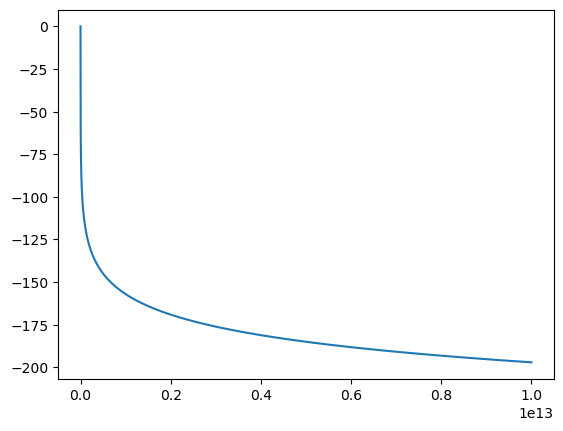

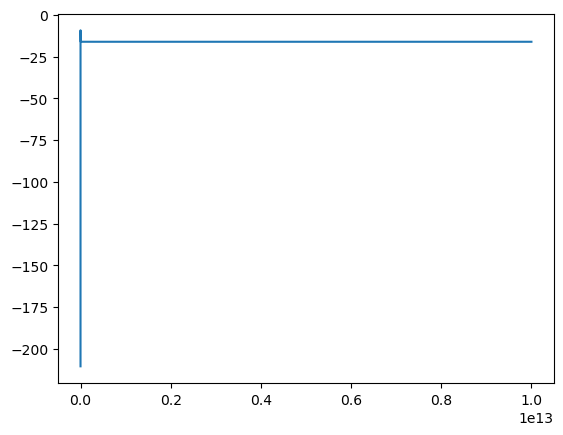

In [139]:
plt.figure()
plt.plot(f, 20*np.log10(np.abs(S11)))
plt.show()
plt.figure()
plt.plot(f, 20*np.log10(np.abs(S12)))
plt.show()
plt.figure()
plt.plot(f, 20*np.log10(np.abs(S21)))
plt.show()
plt.figure()
plt.plot(f, 20*np.log10(np.abs(S22)))
plt.show()

In [142]:
fstart = 1e3
fstop = 100e9
fpoints = 100
f = np.logspace(np.log10(fstart), np.log10(fstop), fpoints)

In [145]:
print(f*f)

[1.00000000e+06 1.45082878e+06 2.10490414e+06 3.05385551e+06
 4.43062146e+06 6.42807312e+06 9.32603347e+06 1.35304777e+07
 1.96304065e+07 2.84803587e+07 4.13201240e+07 5.99484250e+07
 8.69749003e+07 1.26185688e+08 1.83073828e+08 2.65608778e+08
 3.85352859e+08 5.59081018e+08 8.11130831e+08 1.17681195e+09
 1.70735265e+09 2.47707636e+09 3.59381366e+09 5.21400829e+09
 7.56463328e+09 1.09749877e+10 1.59228279e+10 2.31012970e+10
 3.35160265e+10 4.86260158e+10 7.05480231e+10 1.02353102e+11
 1.48496826e+11 2.15443469e+11 3.12571585e+11 4.53487851e+11
 6.57933225e+11 9.54548457e+11 1.38488637e+12 2.00923300e+12
 2.91505306e+12 4.22924287e+12 6.13590727e+12 8.90215085e+12
 1.29154967e+13 1.87381742e+13 2.71858824e+13 3.94420606e+13
 5.72236766e+13 8.30217568e+13 1.20450354e+14 1.74752840e+14
 2.53536449e+14 3.67837977e+14 5.33669923e+14 7.74263683e+14
 1.12332403e+15 1.62975083e+15 2.36448941e+15 3.43046929e+15
 4.97702356e+15 7.22080902e+15 1.04761575e+16 1.51991108e+16
 2.20513074e+16 3.199267